In [2]:
from scipy.stats import ttest_ind
import numpy as np
import pandas as pd
# import os
# from glob import glob
# import numpy as np
from level2_utils import get_data_for_confirmed_train_subjs, read_yaml_for_host
# from level2_utils import *

import sys
sys.path.append('/Users/benjaminsmith/Google Drive/oregon/code/DEV_scripts/analyses/intervention_moderation/')
from dev_interaction_util import load_groups_from_mastersheet
sys.path.append('/Users/benjaminsmith/Google Drive/oregon/code/DEV_scripts/fMRI/fx/models/SST/')
import level2.level2_utils

config_data = read_yaml_for_host("l2_config.yml")
# nonbids_data_path = config_data['nonbids_data_path']
# ml_data_folderpath = nonbids_data_path + "fMRI/ml"
# dev_scripts_path = config_data['dev_scripts_path']
# ml_scripting_path = dev_scripts_path + "/fMRI/ml"
dropbox_datapath = config_data['dropbox_datapath']
sst_level_2_path = config_data['sst_level_2_path']

spm_path = config_data['spm_path']

analysis_name = 'health_conditions'

output_name = analysis_name + '_groups'

groups_by_name = load_groups_from_mastersheet(dropbox_datapath + 'DEV Participant Mastersheet_copy.xlsx')


Benjamins-MacBook-Pro-2.local


In [32]:
sst_level_2_path

'/Users/benjaminsmith/Dropbox (University of Oregon)/UO-SAN Lab/Berkman Lab/Devaluation/analysis_files/level2/SST/'

In [3]:
dir_for_analysis = sst_level_2_path + 'health_conditions_groups_20230908/raw_filelist.csv'

In [4]:
analysis_subject_table_raw = pd.read_csv(dir_for_analysis,index_col=0)
groups_by_name = load_groups_from_mastersheet(dropbox_datapath + 'DEV Participant Mastersheet_copy.xlsx')

#merge on subject ID
analysis_subject_table = analysis_subject_table_raw.merge(groups_by_name, how='left', left_on='subject_id', right_on='dev_id')

In [31]:
print(set(analysis_subject_table_raw.subject_id).difference(set(included_subjects)))
print(set(included_subjects).difference(set(analysis_subject_table_raw.subject_id)))

{'DEV099', 'DEV088', 'DEV201', 'DEV187', 'DEV199', 'DEV036', 'DEV107', 'DEV158', 'DEV008', 'DEV018', 'DEV195', 'DEV292', 'DEV208', 'DEV102', 'DEV291', 'DEV272', 'DEV049', 'DEV048', 'DEV026', 'DEV122', 'DEV024', 'DEV241', 'DEV016', 'DEV200', 'DEV013', 'DEV209'}
{'DEV198', 'DEV064', 'DEV310', 'DEV249', 'DEV276', 'DEV216', 'DEV299', 'DEV284', 'DEV309', 'DEV273', 'DEV137', 'DEV177', 'DEV265', 'DEV304', 'DEV126', 'DEV196', 'DEV297', 'DEV143', 'DEV266'}


Now filter on data quality.

In [5]:
config_data

{'rubric_dir': '/Users/benjaminsmith/Dropbox (University of Oregon)/UO-SAN Lab/Berkman Lab/Devaluation/DEV_scoring_rubrics',
 'dropbox_datapath': '/Users/benjaminsmith/Dropbox (University of Oregon)/UO-SAN Lab/Berkman Lab/Devaluation/analysis_files/data/',
 'nonbids_data_path': '/Users/benjaminsmith/Google Drive/oregon/data/DEV/nonbids_data/',
 'sst_wave1_path': '/Users/benjaminsmith/Google Drive/oregon/data/DEV/nonbids_data/fMRI/fx/models/SST/wave1/',
 'fmriprep_dir': '/Users/benjaminsmith/Google Drive/oregon/data/DEV/bids_data/derivatives/fmriprep_2022/',
 'spm_l2_script_template_filepath': '/Users/benjaminsmith/Google Drive/oregon/code/DEV_scripts/fMRI/fx/models/SST/level2/template_one_sample_design_estimate.m',
 'spm_l2_script_w_confounders_template_filepath': '/Users/benjaminsmith/Google Drive/oregon/code/DEV_scripts/fMRI/fx/models/SST/level2/template_one_sample_with_confounders_design_estimate.m',
 'confounder_template_path': '/Users/benjaminsmith/Google Drive/oregon/code/DEV_scr

In [6]:
train_betas_with_data = level2.level2_utils.get_sst_data_for_confirmed_sessions_across_tasks(
    beta_glob = config_data['nonbids_data_path'] + "fMRI/fx/models/SST/all_waves/health_conditions/sub-DEV*/",
    #nonbids_data_path = config_data['nonbids_data_path'],
    #ml_data_folderpath = ml_data_folderpath,
    #ml_scripting_path = config_data['dev_scripts_path'] + "/fMRI/ml",
    dropbox_datapath=config_data['dropbox_datapath'],
    subj_wave_inclusion='all'
)

included_subjects = train_betas_with_data['subject_id'].unique()
del train_betas_with_data

loaded 275 rows from data_by_ppt.csv
543 sessions remaining on the provisional useable_dev_id list from the redcap list after excluding subjects excluded by motion quality process.
(250, 3) (275, 173) (287, 176)
(543, 35) (571, 43) (572, 80)
(287, 177) (572, 80) (574, 256)
['beta_subject_id', 'SID', 'subject_id', 'redcap_dev_id', 'redcap_wave', 'motion_exclude_wave', 'motion_exclude_missing wave', 'wave_id']
subjects who did or did not pass the scanner room report check:
redcap_SST
Investigate               6
May not be usable         5
Minor problems           31
No reported problems    480
Unusable                 20
dtype: int64
True     480
False     94
Name: redcap_SST, dtype: int64
subjects who did or did not pass the motion check:
True     545
False     29
Name: motion_exclude_SST_Exclude, dtype: int64
subjects who did or did not have beta data:
True     501
False     73
Name: spm_l2_path, dtype: int64
subjects who did or did not have behavioral data:
True     534
False     40
N

/Users/benjaminsmith/Google Drive/oregon/code/DEV_scripts/fMRI/fx/models/SST/level2/level2_utils.py:465: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_by_wave = [selected_data[session_quality_data.wave_id==w] for w in selected_data.wave_id.unique()]


In [7]:
roi_table_path = sst_level_2_path + 'health_conditions_groups_20230908/Unhealthy_NoGo(W2-W1)/rois_raw.csv'

roi_table_1 = pd.read_csv(roi_table_path)
roi_table_insula_path = sst_level_2_path + 'health_conditions_groups_20230908/Unhealthy_NoGo(W2-W1)/rois_raw_insula.csv'
roi_table_insula = pd.read_csv(roi_table_insula_path)



spm_roi_table = pd.concat([roi_table_1,roi_table_insula],axis=1)

In [8]:
spm_roi_table_vars = spm_roi_table.columns.values

In [9]:
roi_table_functional_path = '/Users/benjaminsmith/Dropbox (University of Oregon)/UO-SAN Lab/Berkman Lab/Devaluation/analysis_files/data/subject_sst_health_avg_roi_data_raw_zscored.csv'
roi_table_functional = pd.read_csv(roi_table_functional_path,index_col=0)


In [10]:
roi_table_functional_mask_names = roi_table_functional.mask_label.unique()
#transform wider using mask_label as the column names and roi_activity as the values
roi_table_functional_wide = roi_table_functional.pivot(
    index=['subject_id'],
    columns=['condition','mask_label'],
    values='roi_activity')

#now flatten the column names
roi_table_functional_wide.columns = ['_'.join(col).strip() for col in roi_table_functional_wide.columns.values]
roi_table_functional_wide = roi_table_functional_wide.reset_index()

In [11]:
[df.columns[0:5] for df in [analysis_subject_table,spm_roi_table, roi_table_functional_wide[roi_table_functional_wide.columns]]]

[Index(['subject_id', 'spm_l2_path', 'spm_l2_path_description', 'SID',
        'cancer_promoting_minus_preventing_FCI'],
       dtype='object'),
 Index(['y_neurosynth_response_inhibition_sfg_mean',
        'y_neurosynth_response_inhibition_right_frontal_pole_mean',
        'y_neurosynth_response_inhibition_insula_mean'],
       dtype='object'),
 Index(['subject_id',
        'Unhealthy_NoGo(W2-W1)_response inhibition_association-test_z_FDR_0.01',
        'Unhealthy_NoGo(W2-W1)_value_association-test_z_FDR_0.01',
        'Unhealthy_NoGo(W2-W1)_striatum_joint_reward_mask',
        'Unhealthy_NoGo(W2-W1)_value_association_frontal_medial_cortex'],
       dtype='object')]

In [12]:
spml2_derived = pd.concat([analysis_subject_table,spm_roi_table],axis=1)

subjects_with_rois = pd.merge(spml2_derived,roi_table_functional_wide,how='left',on='subject_id')

roi_table_functional_mask_names = roi_table_functional_wide.columns.values[1:]

OK, we have the data, now let's do some contrasts. Contrast umpqua and mckenzie with willamette on both ROIs using a t-test

In [13]:
roi_colnames = spm_roi_table_vars.tolist() + roi_table_functional_mask_names.tolist()

In [17]:
subjects_with_rois.loc[subjects_with_rois['intervention_group'] == 'willamette',['subject_id',roi_colname]]

,subject_id,Stop(Healthy>Unhealthy)(W2-W1)_value_association_frontal_medial_cortex
1,DEV013,NaN
5,DEV017,0.062803
9,DEV021,-0.988117
11,DEV024,NaN
19,DEV038,0.459369
22,DEV042,-0.912795
29,DEV051,0.295335
34,DEV056,-0.548938
35,DEV057,-0.780473
36,DEV058,0.608716


In [14]:
for roi_colname in roi_colnames:
    print(roi_colname)
    for experimental_group in ['umpqua','mckenzie']:
        print(experimental_group)
        control_group_data = subjects_with_rois.loc[subjects_with_rois['intervention_group'] == 'willamette',roi_colname]
        experimental_group_data = subjects_with_rois.loc[subjects_with_rois['intervention_group'] == experimental_group,roi_colname]
        #do independent-samples t-test

        t,p = ttest_ind(control_group_data,experimental_group_data)
        print('cont: ' + str(np.mean(control_group_data)) + '; exp: ' + str(np.mean(experimental_group_data)))
        print("t-score: " + str(t) + "; p-val: " + str(p))
    print("")
        
        

y_neurosynth_response_inhibition_sfg_mean
umpqua
cont: -0.030815139905109125; exp: -0.2755942041691716
t-score: 1.279082559606822; p-val: 0.20342077457535257
mckenzie
cont: -0.030815139905109125; exp: -0.16985442180931276
t-score: 0.7066817055846746; p-val: 0.48110088299551146

y_neurosynth_response_inhibition_right_frontal_pole_mean
umpqua
cont: 0.0850811982455077; exp: -0.39629441587157666
t-score: 2.1969134550119787; p-val: 0.030014637607882647
mckenzie
cont: 0.0850811982455077; exp: 0.04941347927760882
t-score: 0.1697188204174757; p-val: 0.8655100948473187

y_neurosynth_response_inhibition_insula_mean
umpqua
cont: -0.0011634111929030538; exp: -0.042298248265300736
t-score: 0.3073900507659048; p-val: 0.7590976844058896
mckenzie
cont: -0.0011634111929030538; exp: -0.1349143194361554
t-score: 1.0105010546056485; p-val: 0.31423901092434126

Unhealthy_NoGo(W2-W1)_response inhibition_association-test_z_FDR_0.01
umpqua
cont: -0.01217045264671536; exp: -0.05184400126118936
t-score: nan; p-

In [15]:
control_group_data

1           NaN
5      0.062803
9     -0.988117
11          NaN
19     0.459369
22    -0.912795
29     0.295335
34    -0.548938
35    -0.780473
36     0.608716
42     0.247727
43     0.152618
48     1.030017
49    -0.646289
53     0.026704
54    -1.035766
57    -1.360390
65    -0.961814
66    -0.149061
73          NaN
79    -0.263498
80     0.477831
81     0.308169
83     0.557496
88     0.628929
91    -0.722931
92     0.706630
93     1.447597
95     0.009975
99     0.315049
104    0.071900
108    0.609649
109         NaN
111   -0.592574
119    0.365876
129         NaN
132   -0.858075
135    0.123177
137   -0.626063
138    0.664642
144    0.122537
147         NaN
148   -0.283295
149   -0.361867
153   -0.969582
154    0.037225
158   -0.139345
160   -0.065630
164    1.158258
167         NaN
168    0.036190
171    0.869973
176   -0.658907
177   -0.177686
179   -0.533321
180   -0.170276
181    0.612672
183   -0.035686
Name: Stop(Healthy>Unhealthy)(W2-W1)_value_association_frontal_medial_co

Perhaps there is a way to confirm this by looking at the behavioral response modification? We have a measure of which subjects changed their responses the most; does it relate to the change score we are measuring in these ROIs?

# Pre-registered


## Reward responsivity

According to BRT theory, BR Training (vs. Control) decreases reward response activity to unhealthy foods


We have tested this prediction, and found no decreased reward response activity in relation to unhealthy foods in the Stop trials. This is probably better tested in Go trials...


## Response inhibition

- Two theories about the neural mechanism of BRT:
    1. In the **pure response** account, it operates by building up response inhibition to unhealthy foods during Stop trials
        
        If this is true we will expect to see *increased* response inhibition activity in BR Training (vs Control) during Stop trials
        
        (tested, n.s.)

    2. In the **value modification** account, it operates by changing underlying values of of unhealthy foods
        
        If this is true we’d expect to see **decreased** response inhibition activity in BR Training (vs. Control)

        (tested, n.s.)
        
- Cognitive re-appraisal: Again we can have two accounts for neural mechanisms of cognitive reappraisal, **value modification** and **deliberative reframing via response inhibition**
    - In the *value modification* account, we see **decreased** response inhibition activity in CR Training (vs. Control)
    (tested, may be a decrease from t1 to t2)

    - In **deliberative reframing via response inhibition**, we see **increased** response inhibition activity in CR Training

    (tested, contrary evidence)


Could try controlling all of teh above for age_z, gender.


## Valuation

1. In the **pure response** account, we should see no change in valuation for BR Training vs. Control

(tested; change n.s.)

2. In the **value modification** account, we should see **decreased** valuation activity during exposure to healthy foods for BR Training (vs. Control)

(I think this is a typo and it means to say unhealthy foods! We should see **increased** valuation of healhty foods! But we failed to see any change here.)

## Dependent variable
- Reaction Time, measuring average Healthy - Unhealthy over the subject's task
- for response inhibition activity we examine whether there exists neural activity in the right dlPFC, or in a neurosynth response inhibition map, i.e., whether there exists whole-brain level contrast within those areas, or whether there exists significant activity change specifically within the neurosynth response inhibition map 
- for reward responsivity we will examine activity whole-brain level contrast in an anatomical striatum map, or whether there exists significant activity change specifically within a neurosynth reward * anatomical striatum intersection map
- for value we will examine whole-brain level activity contrast within a neurosynth "value" map

## Pre-registration summary

Overall, we found some evidence that cognitive re-appraisal may be effective at decreasing the value of unhealthy foods, evidenced by the _decline_ in response inhibition for unhealthy foods for subjects in this condition.



### Follow-up

We didn't see a significant effect in value change in the vmPFC, however. So we'd want to look for some other kind of evidence that the decilne in response inhibition in the cognitive re-appraisal group is being driven by a decline in value of unhealthy foods, leading to a lower need to inhibit.

We could do taht by correlating decline in response inhibition against the vmPFC signal. Important this is for unhealthy foods specifically.

In [19]:
from scipy.stats import pearsonr

valuation_cols = ['Unhealthy_Go(W2-W1)_value_association_frontal_medial_cortex', #predicted R>0
                  'Unhealthy_NoGo(W2-W1)_value_association_frontal_medial_cortex', #predicted R>0
                  'Unhealthy_NoGo(W2-W1)_striatum_joint_reward_mask' #uncertain
                  ]



In [20]:

resp_inhibition = 'y_neurosynth_response_inhibition_right_frontal_pole_mean'



for group_name in ['umpqua','mckenzie', 'willamette']:
    print(group_name)
    #expecting a significant association for umpqua, but not willamette; mckenzie is unknown
    subj_group_data = subjects_with_rois.loc[subjects_with_rois['intervention_group'] == group_name]
    for valuation_col in valuation_cols:
        print(valuation_col)
        #remove items that are nan in either column
        selected_rows = subj_group_data[valuation_col].notnull() & subj_group_data[resp_inhibition].notnull()
        print(selected_rows.shape[0])
        # do a pearson correlation of the valuation_col with resp_inhibition
        # get the correlation coefficient as well as the p-value
        r,p = pearsonr(subj_group_data.loc[selected_rows,valuation_col],subj_group_data.loc[selected_rows,resp_inhibition])
        print("r: " + str(r) + "; p: " + str(p))
    print("\n")

umpqua
Unhealthy_Go(W2-W1)_value_association_frontal_medial_cortex
60
r: 0.1730314179428764; p: 0.20220713493501524
Unhealthy_NoGo(W2-W1)_value_association_frontal_medial_cortex
60
r: 0.20574033122596574; p: 0.12820455628881489
Unhealthy_NoGo(W2-W1)_striatum_joint_reward_mask
60
r: -0.056370820019354416; p: 0.6798596635053206


mckenzie
Unhealthy_Go(W2-W1)_value_association_frontal_medial_cortex
67
r: -0.09783220394364692; p: 0.49020265992385875
Unhealthy_NoGo(W2-W1)_value_association_frontal_medial_cortex
67
r: -0.0693361920284723; p: 0.6252490976565214
Unhealthy_NoGo(W2-W1)_striatum_joint_reward_mask
67
r: -0.029643245905177477; p: 0.8347527373130927


willamette
Unhealthy_Go(W2-W1)_value_association_frontal_medial_cortex
58
r: -0.10637276291231249; p: 0.4575225785295044
Unhealthy_NoGo(W2-W1)_value_association_frontal_medial_cortex
58
r: -0.17688075601337303; p: 0.2143532931295234
Unhealthy_NoGo(W2-W1)_striatum_joint_reward_mask
58
r: 0.01990892384849194; p: 0.8897132491198327




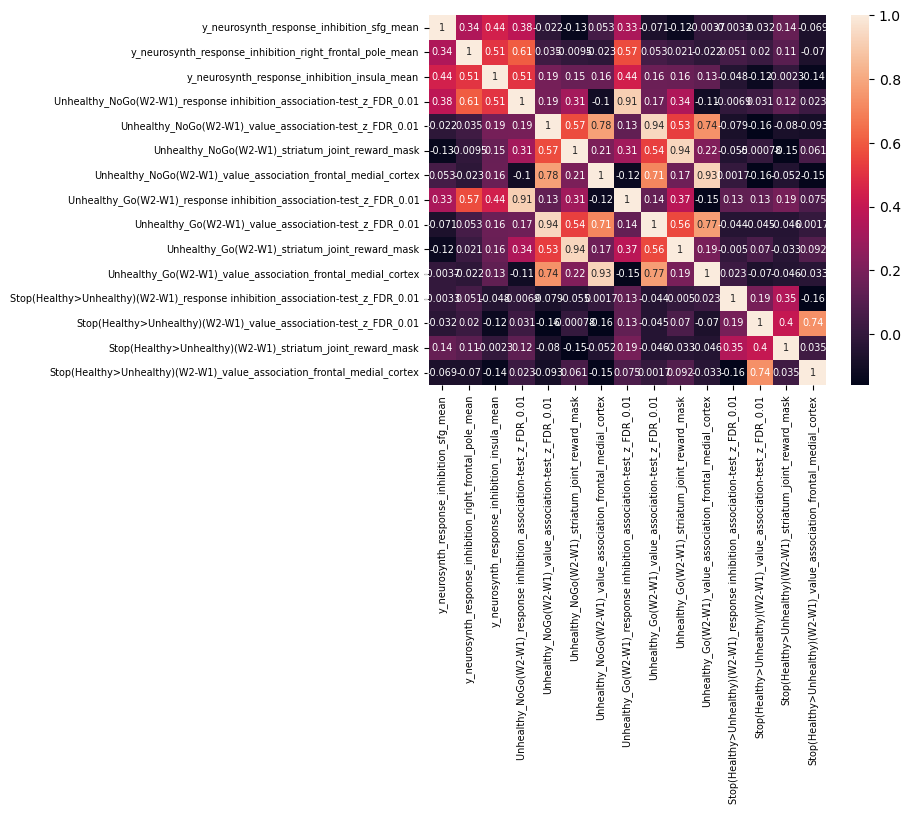

In [21]:
import matplotlib.pyplot as plt
#do a correlation matrix plot for all the valuation_cols
import seaborn as sns



#now do the corrplot
#print a heatmap with two-digit correlation coefficients for each pair of variables
#use annot=True and dont' make the font size too big
corr = subjects_with_rois[roi_colnames].corr()
ax = sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True,
            annot_kws={"size": 7}
            )
ax.xaxis.set_tick_params(labelsize=7)
ax.yaxis.set_tick_params(labelsize=7)

plt.show()

Perhaps we don't have a proper control because all these ROIs are correlated, and they shouldn't be so highly correlated.

Could check this by getting the mean of each subject's image. If they're not zero, those would be driving the correlation, and we should be doing something different.

## Pre-registration summary

Overall, we found some evidence that 